# OceanOptics 2017
# Lab 5: Extracted Chlorophyll-a 


The purpose of this notebook is to calculate chlorophyll-a and pheophyton from our extracted chlorophyll-a samples that we have extracted. We will also propagate instrument uncertainty, compute the standard deviation of the replicates, and compare results bewrtwqeen students. Finally, we will calculate chlorophyll-a specific absorption coefficients for DRE samples. 

In [8]:
# This notebook was built in Catherine's root environment.  
# authors:
# Catherine Kuhn
# Elena Terzić
# Brian Lamb
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
#import seaborn as sns

In [9]:
%matplotlib inline

### Import the data

In [10]:
%cd /Users/ckuhn/Documents/oceanoptics/Labs/Lab05/ # set to your working directory

[WinError 3] The system cannot find the path specified: '/Users/ckuhn/Documents/oceanoptics/Labs/Lab05/ # set to your working directory'
C:\Users\elena\Dropbox\oceanoptics2017_students\Lab5_ap\Fluorometer


This .csv contains the chl a and pheo a already calculated from the spreadsheet that was given to use by our amazing TA Jordan

In [11]:
data = pd.read_csv('fluorometer_data_for_elena.csv', delimiter=',')

# Set your global variables

In [12]:
# Uncertainty terms:
    
# sigma K given in the lab

sigma_K = 0.03
    
# These numbers are the uncertainty associated with when the instrument read the chla and pheo during calibration. 
# We are ballparking these numbers

sigma_phi_chla = 3.
sigma_phi_pheo = 1.5

phi_chla = 500.  # these are the conc associated with the standards 
phi_pheo = 250.  # these are the conc associated with the standards
    
# These numbers are the uncertainty we observed when we were taking measurements. The initial chlorophyll and final 
# chlorophyll 

sigma_F_init  = 3.
sigma_F_final = 1.5
       
# These are the calibration coefficients that we pulled from the lab spreadsheet from the last calibration, which was 
# conducted on April 27, 2012
    
K = 0.36 
A = 1.88

# Volumes

sigma_v = 0.0005   # let's say we spilled 0.5 mL
sigma_V = 0.005   # let's say we spilled 5 mL

v = 0.005  # acetone
V = 0.289  # volume of water filtered for the sample  

### Add in your sample information

In [13]:
data.head()

,filter_date,v_acetone_L,V_sample_L,Fo,Fa,chl_ugL,phaeo_ugL
0,7/12/17,0.005,0.289,590,358,3.07,2.20
1,7/12/17,0.005,0.289,573,345,3.02,2.00
2,7/12/17,0.005,0.289,536,330,2.72,2.23
3,7/12/17,0.005,0.289,638,389,3.29,2.47
4,7/12/17,0.005,0.290,609,363,3.24,1.94


In [25]:
# One formula to rule them all 
sigma_A_ls = []
sigma_AoverAminus1_ls = []
sigma_Finit_minus_Ffinal_ls = []
sigma_vV_ls = []
sigma_chla_ls =[]
#

for row in range (len(data)):

    #print row
    
# Extract measurements from sheet
    f_init = data['Fo'][row]
    f_acid = data['Fa'][row]
    chla_ugL = data['chl_ugL'][row]
    pheo_ugL = data['phaeo_ugL'][row]
    V        = data['V_sample_L'][row]
    v        = data['v_acetone_L'][row]

    
# Compute sigmas
    sigma_A = 1./A * np.sqrt(((sigma_phi_chla/phi_chla)**2.) + ((sigma_phi_pheo/phi_pheo)**2.))
    
    sigma_AoverAminus1 = 1./ (A/(A-1)) * np.sqrt (((sigma_A/A)**2) + ((sigma_A/A)**2.))
    
    sigma_Finit_minus_Ffinal = np.sqrt (((sigma_F_init)**2.) + ((sigma_F_final)**2))
    
    sigma_vV = sigma_v/sigma_V
    
    
    sigma_chla = 1./chla_ugL * np.sqrt (((sigma_K/K)**2) + (sigma_AoverAminus1/ (A/(A-1.))**2.)
                                             + (sigma_Finit_minus_Ffinal/(f_init-f_acid)**2.) 
                                             + ((sigma_vV/(v/V))**2))
    
    
    sigma_A_ls.append(sigma_A)
    #print(sigma_A_ls)
    sigma_AoverAminus1_ls.append(sigma_AoverAminus1)
    sigma_Finit_minus_Ffinal_ls.append(sigma_Finit_minus_Ffinal)
    sigma_vV_ls.append(sigma_vV)
    sigma_chla_ls.append(sigma_chla)
    
    #print(sigma_Finit_minus_Ffinal_ls[row])
    #print(sigma_AoverAminus1_ls[row])
    #print(sigma_Finit_minus_Ffinal_ls[row])
    #print(sigma_chla_ls[row])
    #print(sigma_vV_ls[row])

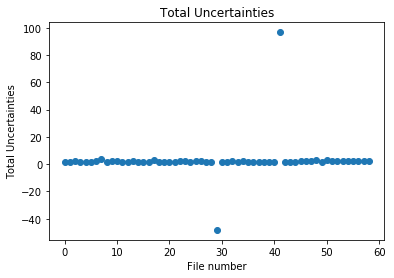

In [23]:
plt.plot(sigma_chla_ls, 'o')
plt.ylabel('Total Uncertainties')
plt.xlabel('File number')
plt.title('Total Uncertainties')

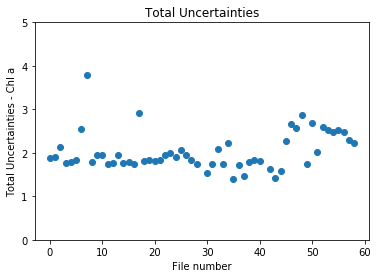

In [35]:
plt.plot(sigma_chla_ls, 'o')
plt.ylim(0,5)
plt.ylabel('Total Uncertainties - Chl a')
plt.xlabel('File number')
plt.title('Total Uncertainties')
plt.savefig('Total Uncertainties', dpi=1200)

In [36]:
x = np.arange(0,59)

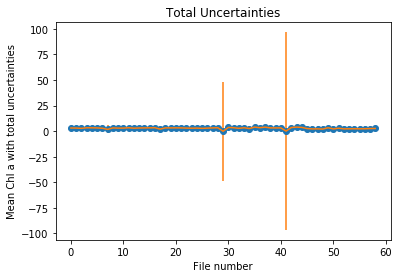

In [37]:

plt.plot(x, data['chl_ugL'], 'o')
plt.errorbar(x, data['chl_ugL'], yerr = sigma_chla_ls)
#plt.ylim(0,5)
plt.ylabel('Mean Chl a with total uncertainties')
plt.xlabel('File number')
plt.title('Total Uncertainties')
plt.savefig('Mean Chl with Total Uncertainties', dpi=1200)

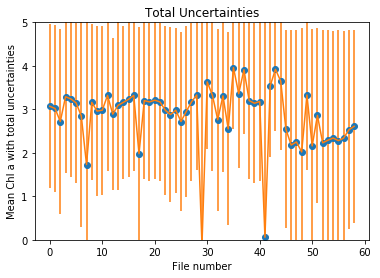

In [38]:
plt.plot(x, data['chl_ugL'], 'o')
plt.errorbar(x, data['chl_ugL'], yerr = sigma_chla_ls)
plt.ylim(0,5)
plt.ylabel('Mean Chl a with total uncertainties')
plt.xlabel('File number')
plt.title('Total Uncertainties')
plt.savefig('Mean Chl with Total Uncertainties - close up', dpi=1200)